In [10]:
"""
        1
    2      3
  4   5    6
  7  8 9 10 11
"""
connections={
    1 : [2,3],
    2 : [1,4,5],
    3 : [1,6],
    4 : [2,7],
    5 : [2,8,9],
    6 : [3,10,11],
    7 : [4],
    8 : [5],
    9 : [5],
    10 : [6,9],
    11 : [6]
}


## 两种搜索方法
区别只有一行\
 path=path+get_connections\
 path=get_connections+path

In [6]:
def BFS (start, destination, connections):
    path=[start]
    seen=set()
    route=[]
    while path:
        successor=path.pop(0)
        if successor==destination:
            return route
        if successor in seen:
            continue
        seen.add(successor)
        route.append(successor)
        get_connections=connections[successor]
        print('standing at {} looking forward{}'.format(successor,get_connections))
        path=path+get_connections


In [39]:
def DFS (start, destination, connections):
    path=[start]
    seen=set()
    route=[]
    while path:
        successor=path.pop(0)
        if successor==destination:
            return route
        if successor in seen:
            continue
        seen.add(successor)
        route.append(successor)
        get_connections=connections[successor]
        print('standing at {} looking forward{}'.format(successor,get_connections))
        path=get_connections+path
 

In [7]:
BFS(1,9,connections)

standing at 1 looking forward[2, 3]
standing at 2 looking forward[1, 4, 5]
standing at 3 looking forward[1, 6]
standing at 4 looking forward[2, 7]
standing at 5 looking forward[2, 8, 9]
standing at 6 looking forward[3, 10, 11]
standing at 7 looking forward[4]
standing at 8 looking forward[5]


[1, 2, 3, 4, 5, 6, 7, 8]

In [40]:
DFS(1,9,connections)

standing at 1 looking forward[2, 3]
standing at 2 looking forward[1, 4, 5]
standing at 4 looking forward[2, 7]
standing at 7 looking forward[4]
standing at 5 looking forward[2, 8, 9]
standing at 8 looking forward[5]


[1, 2, 4, 7, 5, 8]

## 寻路径方法

In [38]:
def find_route(route,connections):
    successor=route.pop()
    route_x=[]
    route_x.append(successor)
    while route:    
        spot=route.pop()
        if spot not in connections[successor]:
            continue
        route_x.append(spot)
        successor=spot
    return route_x[::-1]

In [37]:
find_route(BFS(1,9,connections),connections)

standing at 1 looking forward[2, 3]
standing at 2 looking forward[1, 4, 5]
standing at 3 looking forward[1, 6]
standing at 4 looking forward[2, 7]
standing at 5 looking forward[2, 8, 9]
standing at 6 looking forward[3, 10, 11]
standing at 7 looking forward[4]
standing at 8 looking forward[5]


[1, 2, 5, 8]

# Advanced Map Searching

In [12]:
def search(graph, start, goal, search_strategy=lambda x: x):
    pathes = [[start] ]
    seen = set()
    valid_pathes=[]
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = graph[froniter]
        
        for city in successors: 
            if city in path: continue
            
            new_path = path+[city]
            
            pathes.append(new_path)
        
            if new_path[-1] == goal : valid_pathes.append(new_path)
        seen.add(froniter)
    return search_strategy(valid_pathes)

In [13]:
search(connections,1,9)

[[1, 2, 5, 9], [1, 3, 6, 10, 9]]

In [14]:
coordination_source = """
{name:'lanzhou', geoCoord:[103.73, 36.03]},
{name:'jiayuguan', geoCoord:[98.17, 39.47]},
{name:'xining', geoCoord:[101.74, 36.56]},
{name:'chengdu', geoCoord:[104.06, 30.67]},
{name:'shijiazhuang', geoCoord:[114.48, 38.03]},
{name:'lasa', geoCoord:[102.73, 25.04]},
{name:'guiyang', geoCoord:[106.71, 26.57]},
{name:'wuhan', geoCoord:[114.31, 30.52]},
{name:'zhengzhou', geoCoord:[113.65, 34.76]},
{name:'jinan', geoCoord:[117, 36.65]},
{name:'nanjing', geoCoord:[118.78, 32.04]},
{name:'hefei', geoCoord:[117.27, 31.86]},
{name:'hangzhou', geoCoord:[120.19, 30.26]},
{name:'nanchang', geoCoord:[115.89, 28.68]},
{name:'fuzhou', geoCoord:[119.3, 26.08]},
{name:'guangzhou', geoCoord:[113.23, 23.16]},
{name:'changsha', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'shengyang', geoCoord:[123.38, 41.8]},
{name:'changchun', geoCoord:[125.35, 43.88]},
{name:'haorbing', geoCoord:[126.63, 45.75]},
{name:'taiyuan', geoCoord:[112.53, 37.87]},
{name:'xian', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'beijing', geoCoord:[116.46, 39.92]},
{name:'shanghai', geoCoord:[121.48, 31.22]},
{name:'chongqing', geoCoord:[106.54, 29.59]},
{name:'tianjing', geoCoord:[117.2, 39.13]},
{name:'huhehaote', geoCoord:[111.65, 40.82]},
{name:'nanning', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'yinchuan', geoCoord:[106.27, 38.47]},
{name:'wulumuqi', geoCoord:[87.68, 43.77]},
{name:'xiangang', geoCoord:[114.17, 22.28]},
{name:'aomen', geoCoord:[113.54, 22.19]}
"""

In [19]:
import re

In [25]:
name_pattern = re.compile("name:'\w+'")
coord_pattern = re.compile("Coord:\[\d,\d\]")

In [33]:
city_location={}
for line in coordination_source.split('\n'):
    if line.startswith('//'): continue
    if line.strip() == '': continue
    
    city = re.findall("name:'(\w+)'", line)[0]
    # python re referenes: https://docs.python.org/3/library/re.html
    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
    x_y = tuple(map(float, x_y))
    city_location[city] = x_y
    print(city, x_y)

lanzhou (103.73, 36.03)
jiayuguan (98.17, 39.47)
xining (101.74, 36.56)
chengdu (104.06, 30.67)
shijiazhuang (114.48, 38.03)
lasa (102.73, 25.04)
guiyang (106.71, 26.57)
wuhan (114.31, 30.52)
zhengzhou (113.65, 34.76)
jinan (117.0, 36.65)
nanjing (118.78, 32.04)
hefei (117.27, 31.86)
hangzhou (120.19, 30.26)
nanchang (115.89, 28.68)
fuzhou (119.3, 26.08)
guangzhou (113.23, 23.16)
changsha (113.0, 28.21)
shengyang (123.38, 41.8)
changchun (125.35, 43.88)
haorbing (126.63, 45.75)
taiyuan (112.53, 37.87)
xian (108.95, 34.27)
beijing (116.46, 39.92)
shanghai (121.48, 31.22)
chongqing (106.54, 29.59)
tianjing (117.2, 39.13)
huhehaote (111.65, 40.82)
nanning (108.33, 22.84)
yinchuan (106.27, 38.47)
wulumuqi (87.68, 43.77)
xiangang (114.17, 22.28)
aomen (113.54, 22.19)


In [34]:
city=name_pattern.findall("{name:'lanzhou', geoCoord:[103.73, 36.03]}")

In [52]:
string=coordination_source.split('\n')

In [67]:
city=re.findall("name:'(\w+)'",string[1])

In [68]:
city

['lanzhou']

In [76]:
#正则表达式加括号以获取内容，数字需要注意
city_location={}
for line in coordination_source.split('\n'):
    if line.startswith('//'): continue
    if line.strip() == '': continue
    city = re.findall("name:'(\w+)'",line)[0]
    coord = re.findall("Coord:\[(\d+.\d+), (\d+.\d+)\]",line)[0]
    coord = (float(coord[0]),float(coord[1]))
    city_location[city]=coord
print(city_location)

{'lanzhou': (103.73, 36.03), 'jiayuguan': (98.17, 39.47), 'xining': (101.74, 36.56), 'chengdu': (104.06, 30.67), 'shijiazhuang': (114.48, 38.03), 'lasa': (102.73, 25.04), 'guiyang': (106.71, 26.57), 'wuhan': (114.31, 30.52), 'zhengzhou': (113.65, 34.76), 'jinan': (117.0, 36.65), 'nanjing': (118.78, 32.04), 'hefei': (117.27, 31.86), 'hangzhou': (120.19, 30.26), 'nanchang': (115.89, 28.68), 'fuzhou': (119.3, 26.08), 'guangzhou': (113.23, 23.16), 'changsha': (113.0, 28.21), 'shengyang': (123.38, 41.8), 'changchun': (125.35, 43.88), 'haorbing': (126.63, 45.75), 'taiyuan': (112.53, 37.87), 'xian': (108.95, 34.27), 'beijing': (116.46, 39.92), 'shanghai': (121.48, 31.22), 'chongqing': (106.54, 29.59), 'tianjing': (117.2, 39.13), 'huhehaote': (111.65, 40.82), 'nanning': (108.33, 22.84), 'yinchuan': (106.27, 38.47), 'wulumuqi': (87.68, 43.77), 'xiangang': (114.17, 22.28), 'aomen': (113.54, 22.19)}


In [77]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [78]:
def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [80]:
import networkx as nx

In [81]:
city_graph = nx.Graph()

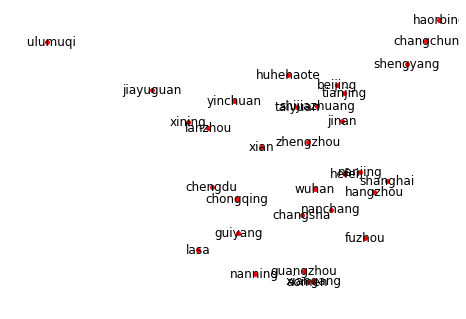

In [88]:
city_graph.add_nodes_from(city_location.keys())
nx.draw(city_graph, city_location, with_labels=True, node_size=15 )

In [91]:
from collections import defaultdict
import math

In [98]:
city_connections = defaultdict(list)
threshold = 700
for c in city_location.keys():
    for d in city_location.keys():
        if c == d : continue
        if get_city_distance(c,d) < threshold:
            city_connections[c].append(d)

city_connections['beijing']           

['shijiazhuang',
 'wuhan',
 'zhengzhou',
 'jinan',
 'nanjing',
 'hefei',
 'hangzhou',
 'nanchang',
 'changsha',
 'taiyuan',
 'tianjing',
 'huhehaote']

In [99]:
city_connection_graph = nx.Graph(city_connections)

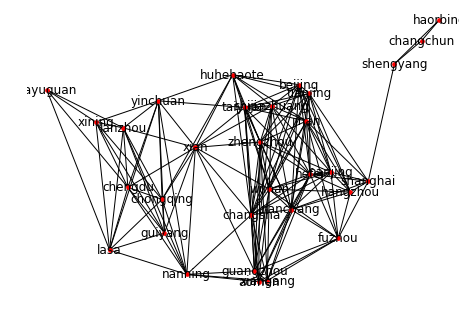

In [101]:
nx.draw(city_connection_graph, city_location, with_labels=True, node_size=13)

In [116]:
#两种Strategy：最短距离和最小换乘
def min_distance(valid_pathes):
    distance=[]
    for path in valid_pathes:
        path_distance = 0
        for i in range(len(path[:-2])):
            path_distance += get_city_distance(path[i],path[i+1])
        distance.append((path,path_distance))
    return sorted(distance, key = lambda x : x[1] )[0]
def min_transfer(valid_pathes):
    return sorted(valid_pathes, key=len)[0]

In [117]:
search(city_connections, 'beijing', 'lanzhou')

[['beijing', 'shijiazhuang', 'xian', 'lanzhou'],
 ['beijing', 'changsha', 'nanning', 'lanzhou'],
 ['beijing', 'taiyuan', 'yinchuan', 'lanzhou'],
 ['beijing', 'huhehaote', 'chongqing', 'lanzhou'],
 ['beijing', 'shijiazhuang', 'xian', 'chengdu', 'lanzhou'],
 ['beijing', 'shijiazhuang', 'xian', 'guiyang', 'lanzhou'],
 ['beijing', 'changsha', 'nanning', 'lasa', 'lanzhou'],
 ['beijing', 'taiyuan', 'yinchuan', 'xining', 'lanzhou']]

In [113]:
search(city_connections, 'beijing', 'lanzhou', search_strategy=min_distance)

(['beijing', 'shijiazhuang', 'xian', 'lanzhou'], 871.7370678343207)

In [115]:
search(city_connections, 'beijing', 'lanzhou', search_strategy=min_transfer)

['beijing', 'shijiazhuang', 'xian', 'lanzhou']